### Import libraries

In [1]:
# First things first, let's bring in pandas. This library is like a swiss army knife for data manipulation.
import pandas as pd

# Now, we'll grab numpy because we'll need it for numerical operations, especially to handle numerical data for correlation.
import numpy as np

# For visualization, seaborn is our go-to. It's built on matplotlib and makes our plots look pretty without much effort.
import seaborn as sns

# And of course, we can't forget about matplotlib itself since it's the foundation for our plotting.
import matplotlib.pyplot as plt

# To aviod warnings 
import warnings
warnings.filterwarnings('ignore')

### Input reading and operations

In [2]:
# Load the datasets
customers_df = pd.read_csv('data/customers.csv')
orders_df = pd.read_csv('data/orders.csv')


#### Q1: Join the two datasets, customers.csv and orders.csv, and print the new joined dataset

Points: 2

In [3]:
# Now, we're going to merge these two 'sheets' into one big 'sheet'. We'll join them on 'customer_id' because it's the common thread linking them together.
joined_df = pd.merge(customers_df, orders_df, on='customer_id')

# Let's print this new, combined 'sheet' out to see what we've got. It's like showing off the finished puzzle after you've put all the pieces together.
display(joined_df)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,payment,order_date,delivery_date
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,24550,2021-4-4,2021-04-06
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,10246,2021-3-6,2021-04-01
2,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,729,35593,2021-2-18,2021-03-01
3,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia,465,48935,2021-5-21,2021-05-23
4,10,Susanetta Wilshin,Bigender,70,615 Hayley KnollSuite 454,2118,Joelburgh,Western Australia,Australia,595,45626,2021-3-9,2021-03-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,286,18840,2021-1-5,2021-01-08
996,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,404,45215,2021-3-3,2021-03-09
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,586,15870,2021-2-27,2021-03-22
998,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,773,21349,2021-7-19,2021-08-07


#### Q2: Create a histogram to visualize the distribution of ages among the customers

Points: 4

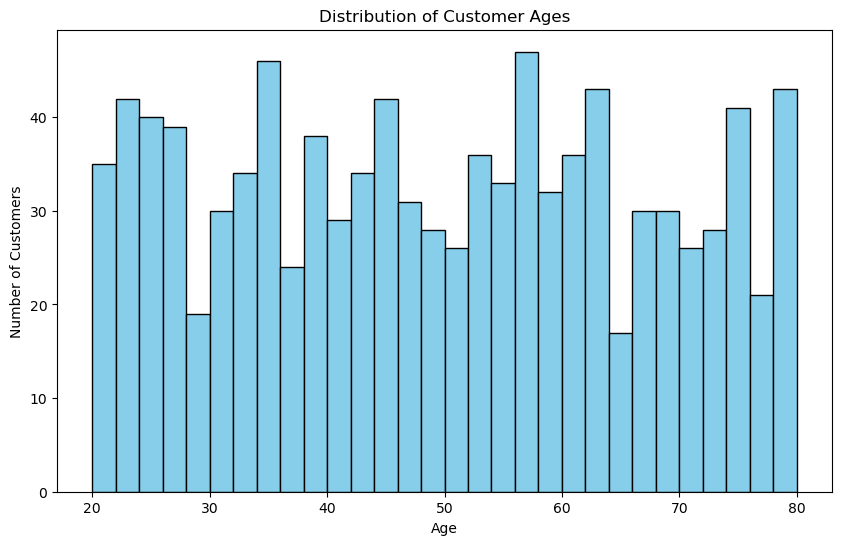

In [4]:
import matplotlib.pyplot as plt

# A histogram is like a snapshot of how spread out the ages are among our customers. Let's set the scene for that snapshot.
plt.figure(figsize=(10, 6))

# With matplotlib, making a histogram is easy. Just tell it which column to look at and how many 'buckets' to divide the data into.
plt.hist(joined_df['age'], bins=30, color='skyblue', edgecolor='black')

# Give the plot a title and label the axes. This is like putting a caption on the snapshot so everyone knows what they're looking at.
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# And now, we show the plot. It's like clicking the shutter button on the camera.
plt.show()


#### Q3: Examine relationships between numerical variables using a pair plot

Points: 4

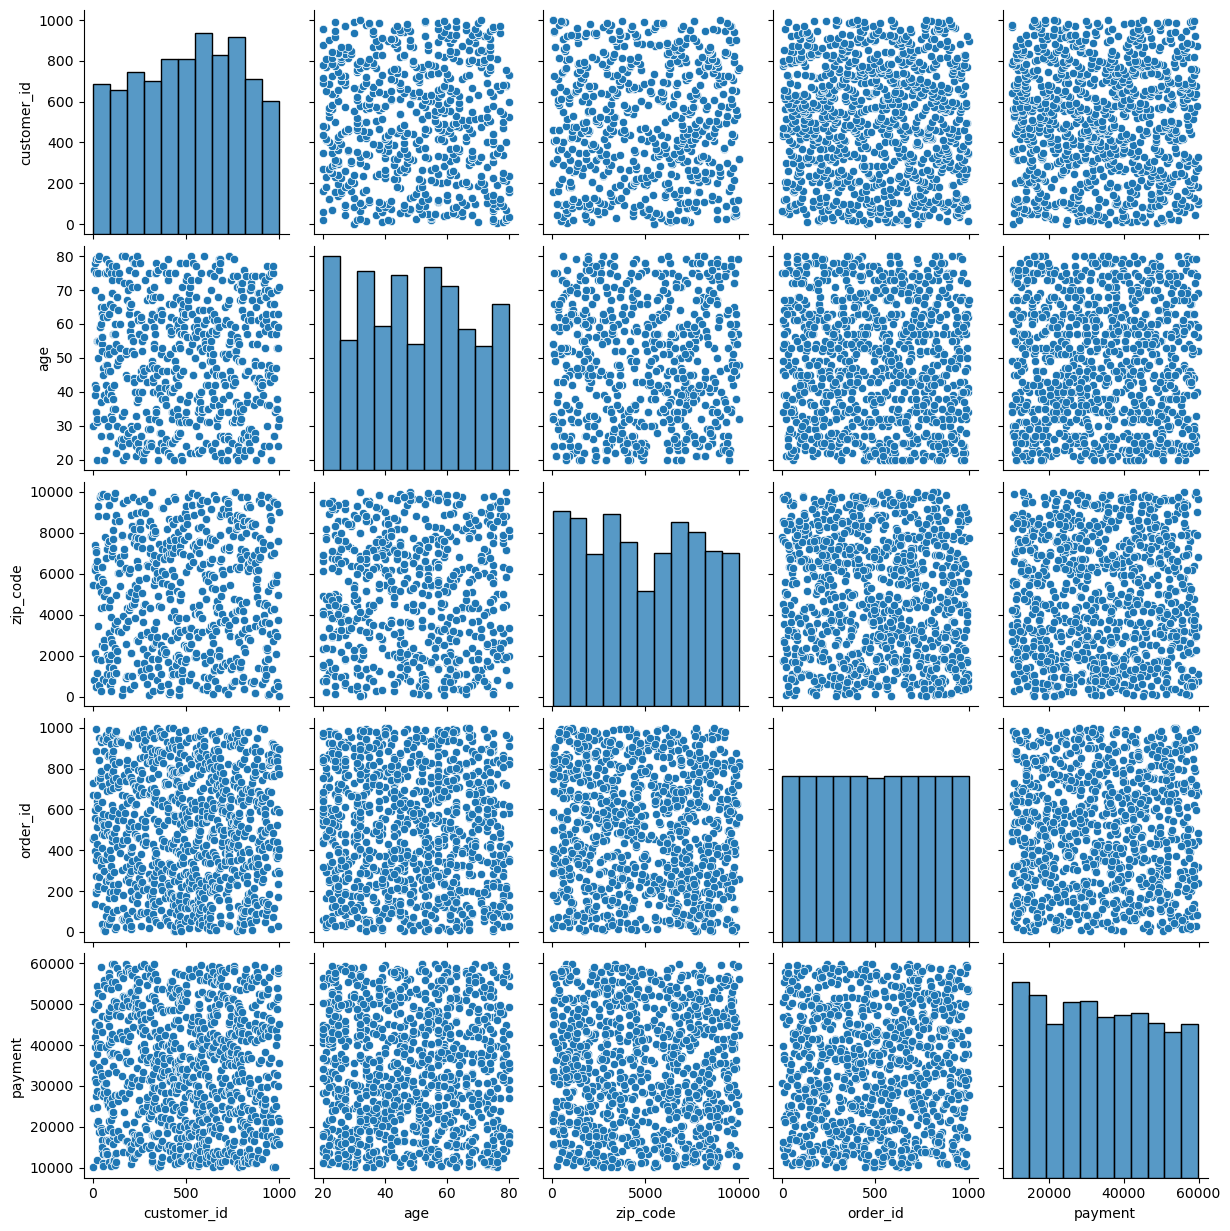

In [5]:
import seaborn as sns

# A pair plot is like a yearbook page showing off each variable's relationship with the others. Let's set it up.
sns.pairplot(joined_df.select_dtypes(include=[np.number]))

# Displaying the pair plot is like turning the page in the yearbook and seeing all the faces looking back at you.
plt.show()



#### Q4: Construct a heatmap to explore the correlation matrix of numerical variables

Points: 4

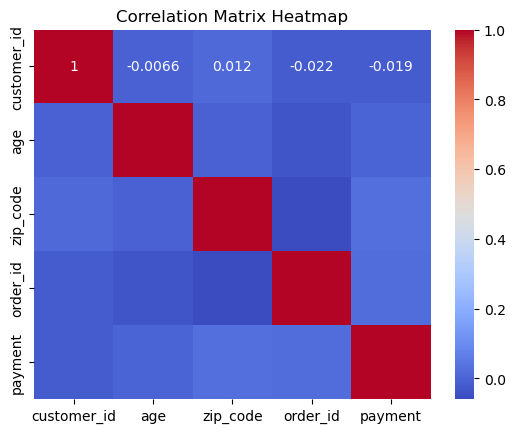

In [6]:
numeric_columns = joined_df.select_dtypes(include=[np.number])
# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Q5: Generate a count plot to analyze the gender distribution within each state. Use different colors for each gender category

Points: 5

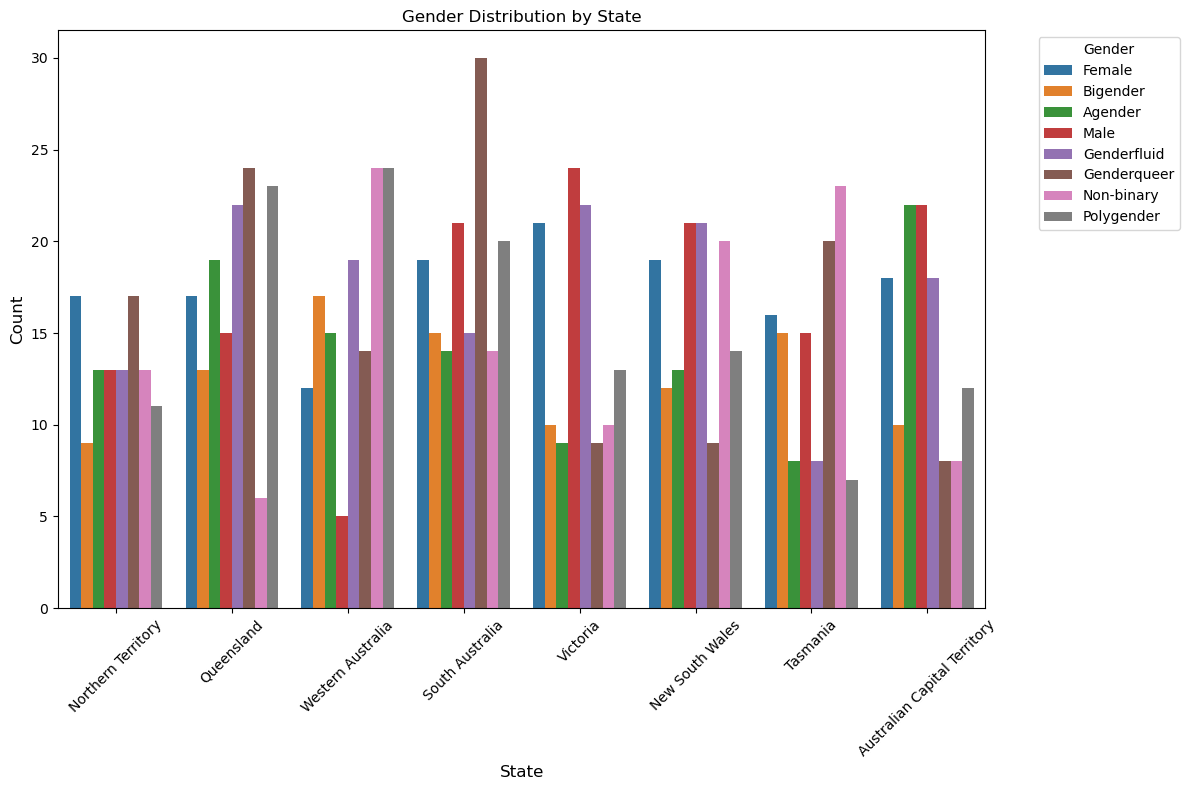

In [7]:
# We want a count plot that shows us the gender distribution by state. This is like making a chart that tells us about the population makeup.

plt.figure(figsize=(12, 8))

sns.countplot(x='state', hue='gender', data=joined_df)

# Titles and labels again, so people know what they're looking at.
plt.title('Gender Distribution by State')
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better visibility if they're overlapping
plt.xticks(rotation=45)

# Optionally, you can move the legend outside the plot to save space
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with the adjustments
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


#### Q6: Create a bar plot to illustrate the number of customers in each state

Points: 2

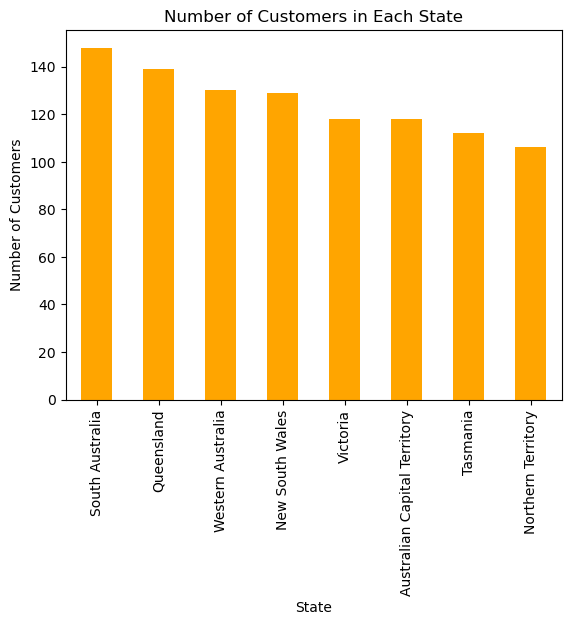

In [8]:
# This bar plot is going to show us how many customers we have in each state. It's like a roll call for our customers by region.
customers_by_state = joined_df['state'].value_counts()
customers_by_state.plot(kind='bar', color='orange')

# Add some informative text and show the plot.
plt.title('Number of Customers in Each State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()


#### Q7: Produce a bar plot to showcase the number of orders placed in each state

Points: 2

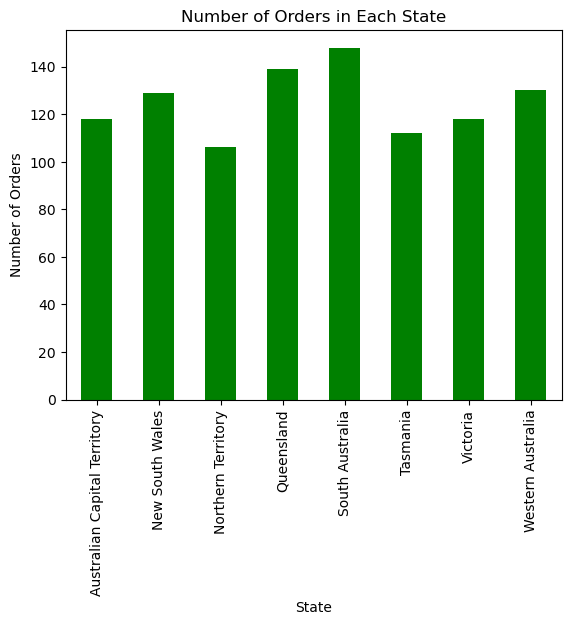

In [9]:
# Here, we're doing a roll call, but for orders this time.
orders_by_state = joined_df.groupby('state').size()
orders_by_state.plot(kind='bar', color='green')

# Title and labels to make everything clear.
plt.title('Number of Orders in Each State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()


#### Q8: Construct a box plot to visualize the distribution of ages in different states

Points: 2

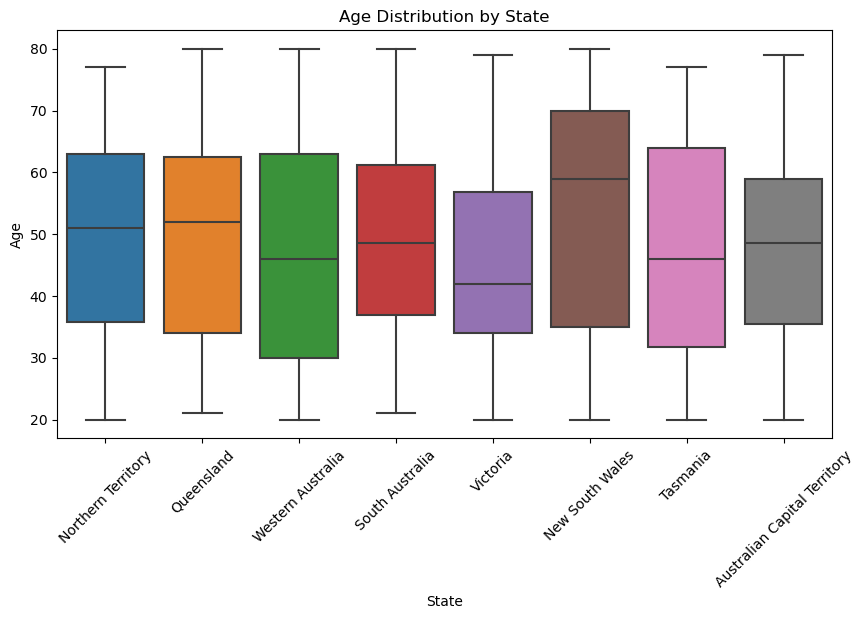

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'joined_df' is your DataFrame

# Increase the figure size
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Create the box plot
sns.boxplot(x='state', y='age', data=joined_df)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Adjust the bottom of the plot to fit the rotated labels
plt.subplots_adjust(bottom=0.2)

# Add title and labels
plt.title('Age Distribution by State')
plt.xlabel('State')
plt.ylabel('Age')

# Display the plot
plt.show()


#### Q9: Examine the time series chart that represents the number of orders and deliveries over time. Use different colors for each time series line

Points: 5

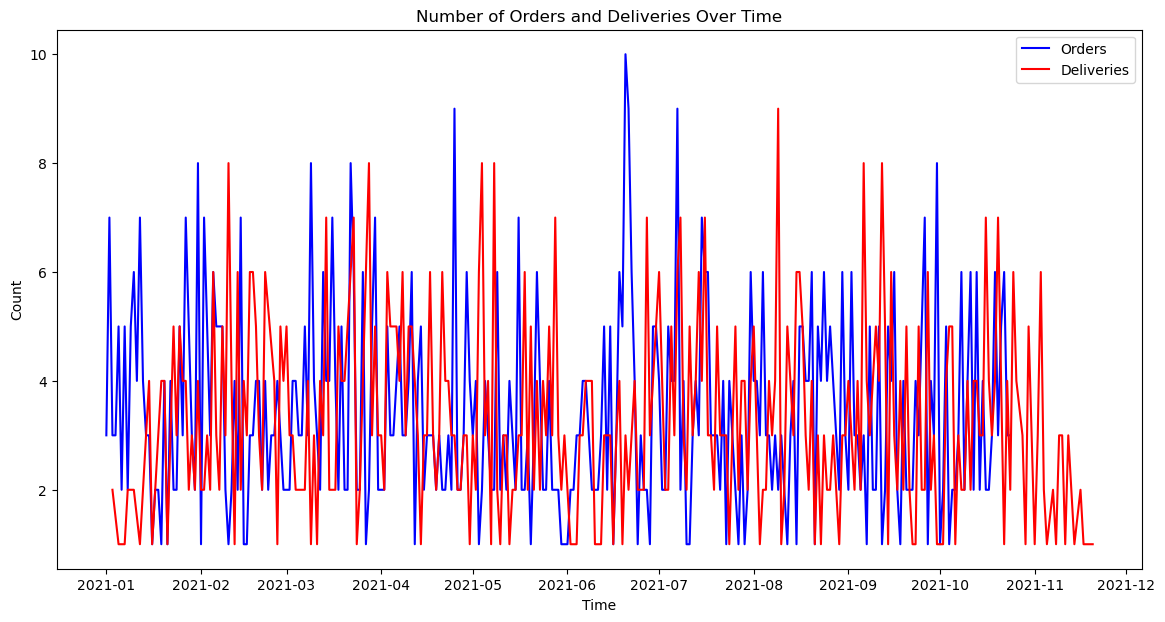

In [11]:
# Now we're looking at orders and deliveries over time. We'll set up a time series chart for that.
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df['delivery_date'] = pd.to_datetime(orders_df['delivery_date'])

# We need to count the number of orders and deliveries per date. Think of this as tallying up daily activities.
orders_over_time = orders_df['order_date'].value_counts().sort_index()
deliveries_over_time = orders_df['delivery_date'].value_counts().sort_index()

# Let's plot them both on the same chart to compare. It's like having two lines of a race to see which one's ahead.
plt.figure(figsize=(14, 7))
plt.plot(orders_over_time.index, orders_over_time.values, label='Orders', color='blue')
plt.plot(deliveries_over_time.index, deliveries_over_time.values, label='Deliveries', color='red')

# Add a legend, title, and labels so it's easy to follow.
plt.legend()
plt.title('Number of Orders and Deliveries Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()
